In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# %matplotlib nbagg
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import rcParams  # Para aumentar la resolución de los gráficos de Matplot
%config InlineBackend.figure_format='retina'
rcParams['font.family'] = 'serif'
rcParams["font.size"] = 14
rcParams['figure.figsize'] = (12, 6)
rcParams['figure.dpi'] = 100
plt.style.use('seaborn-dark-palette')

In [2]:
Field = [] 
#f = np.loadtxt(r"C:\Users\Manue\Labo5/PIVlab_0001.txt", skiprows=3, delimiter=",")
#f = np.loadtxt(r"C:\Users\Manue\Labo5/Sin_remove_outliers.txt", skiprows=1, delimiter="\t")
f = np.loadtxt(r"C:\Users\Manue\Labo5/Con_remove_outliers_a_cada_uv.txt", skiprows=1, delimiter="\t")
Field.append(f)

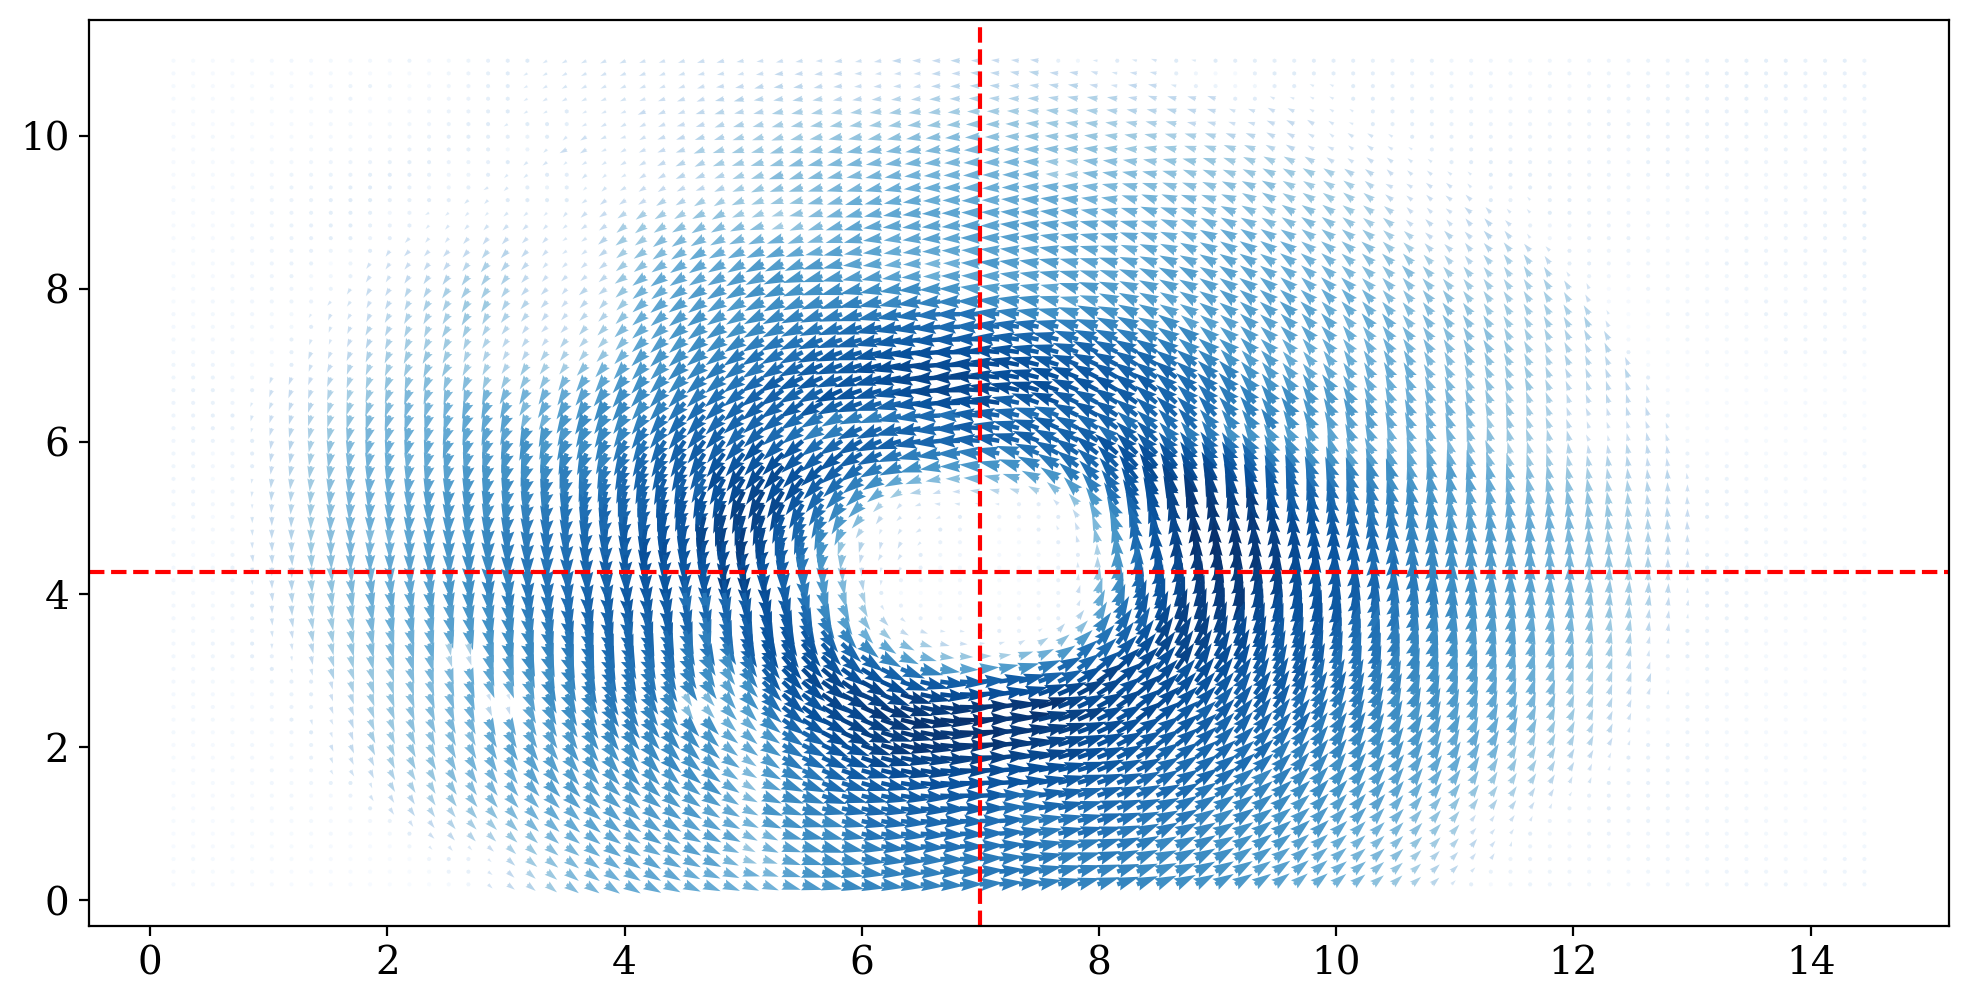

In [3]:
x = Field[0][:,0]
y = Field[0][:,1]
u = Field[0][:,2]
v = Field[0][:,3]


color = np.hypot(u, v)
color=(color-min(color))/(max(color)-min(color))
C=plt.cm.Blues(color)

fig, ax = plt.subplots(1,1)
img = mpimg.imread(r"C:\Users\Manue\Labo5//0001.jpg")
#ax.imshow(img)
#plt.axhline(640, ls='--', c='r')
#plt.axvline(680, ls='--', c='r')
plt.axhline(4.3, ls='--', c='r')
plt.axvline(7, ls='--', c='r')
Q = ax.quiver(x,y,u,v, color=C)

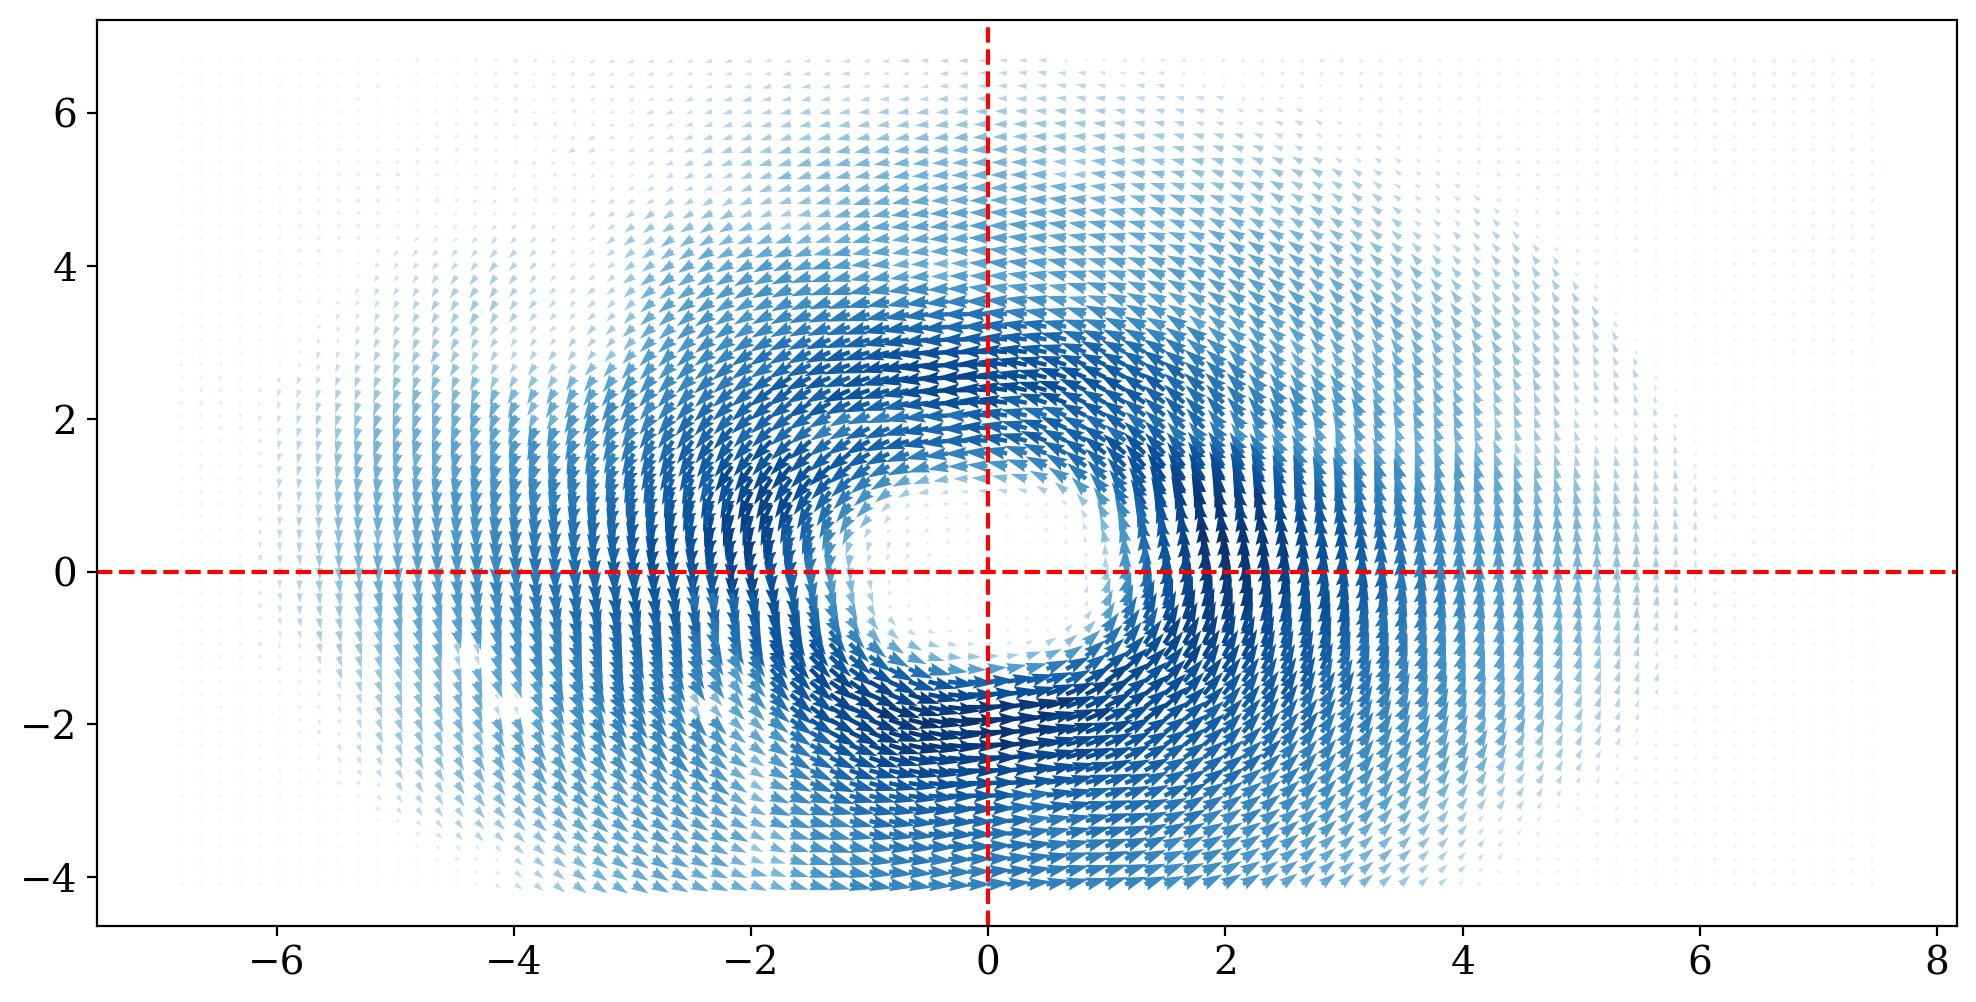

In [5]:
#centro = (700,680)
centro = (7,4.3)
x_corrido = Field[0][:,0]-centro[0]
y_corrido = Field[0][:,1]-centro[1]
#y_corrido = -Field[0][:,1]+centro[1] # Porque 0 es arriba y desciende a 1000

color = np.hypot(u, v)
color=(color-min(color))/(max(color)-min(color))
C=plt.cm.Blues(color)

fig, ax = plt.subplots(1,1)
plt.axhline(0, ls='--', c='r')
plt.axvline(0, ls='--', c='r')
#ax.imshow(img)
Q = ax.quiver(x_corrido,y_corrido,u,v, color=C)
plt.savefig("Campo vel")

In [7]:
def cart2pol(z):
    return np.abs(z), np.angle(z)

y_complejo = []
for i in y_corrido:
    y_complejo.append(complex(0,i))

r = []
theta = []
for i in range(len(x_corrido)):
    z = x_corrido[i]+y_complejo[i]
    r_i, theta_i = cart2pol(z)
    #if ~(np.isnan(u[i]) and ~np.isnan(v[i])):
    r.append(r_i)
    theta.append(theta_i)

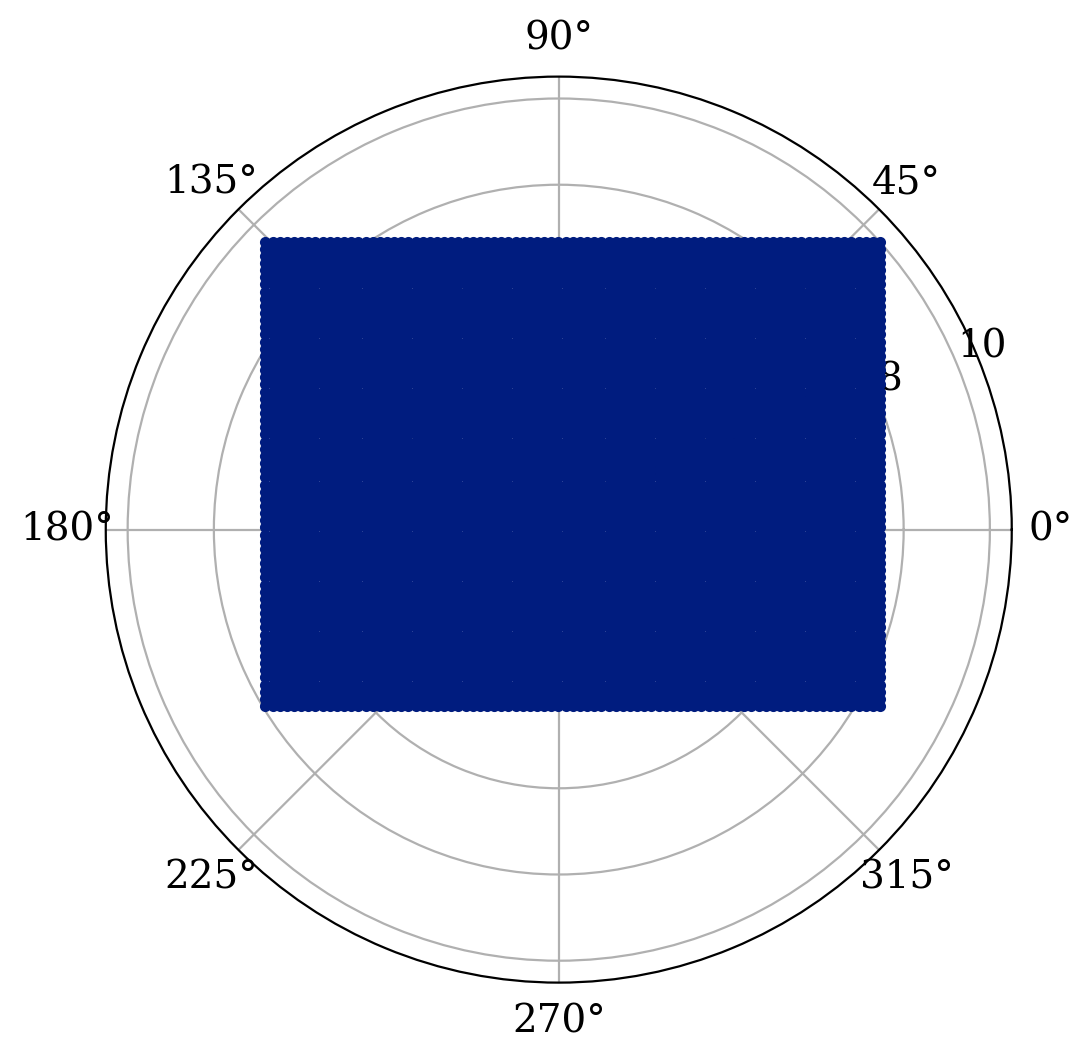

In [8]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r,'.')
#ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
plt.show()

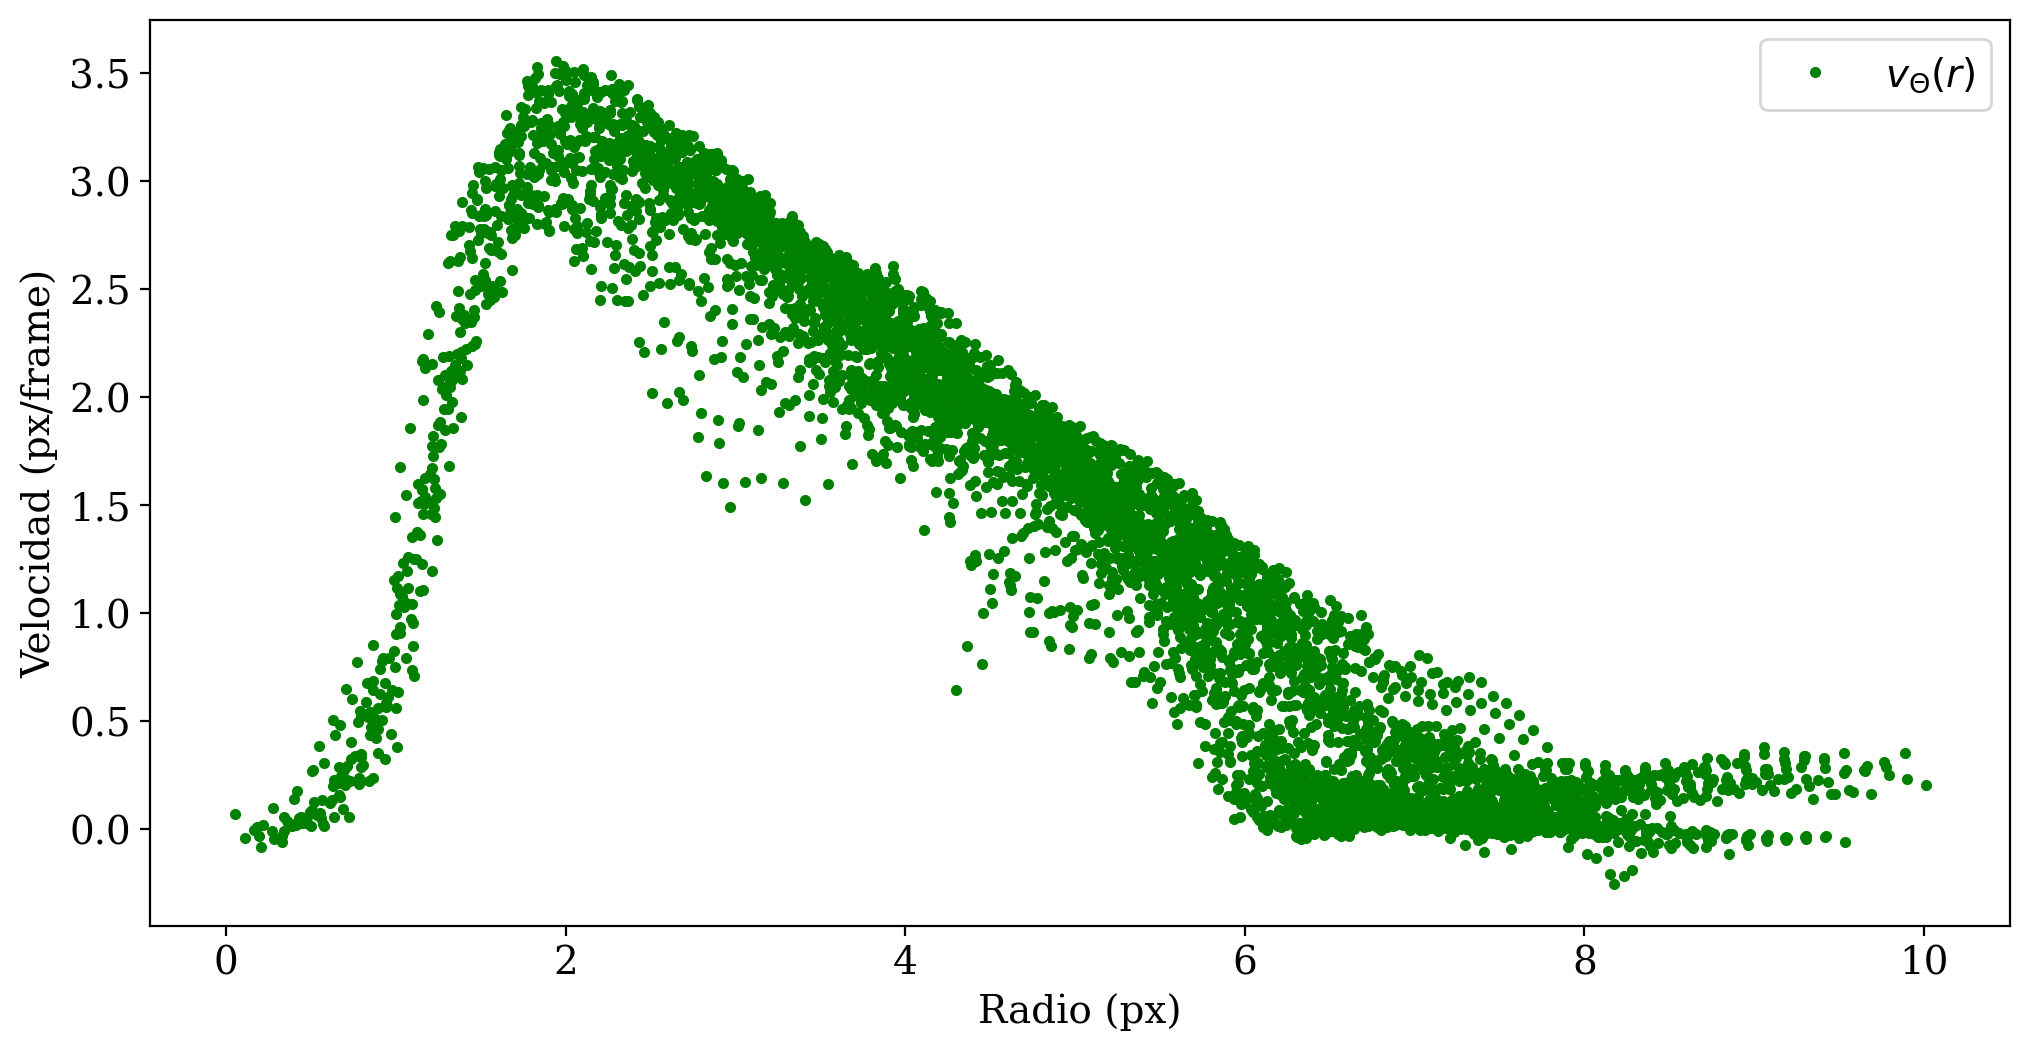

In [21]:
v_r= (x_corrido*u+y_corrido*v)/r
v_theta = (x_corrido*v-y_corrido*u)/(r)

#v_r, v_theta = [], []

#for i in range(len(r)): #Guardar por si hay algun nan
#    v_r_i = (x_corrido[i]*u[i]+y_corrido[i]*v[i])/r[i]
#    v_theta_i = (x_corrido[i]*v[i]-y_corrido[i]*u[i])/(r[i])
#    v_r.append(v_r_i)
#    v_theta.append(v_theta_i)

#plt.plot(r,v_r,".",label = "$v_{r}(r)$")
plt.plot(r,v_theta,".",label = "$ v_{\Theta} (r)$", color = "green")
plt.xlabel('Radio (px)')
plt.ylabel('Velocidad (px/frame)')
plt.legend()
plt.savefig("Gráficos campo.png")
plt.show()

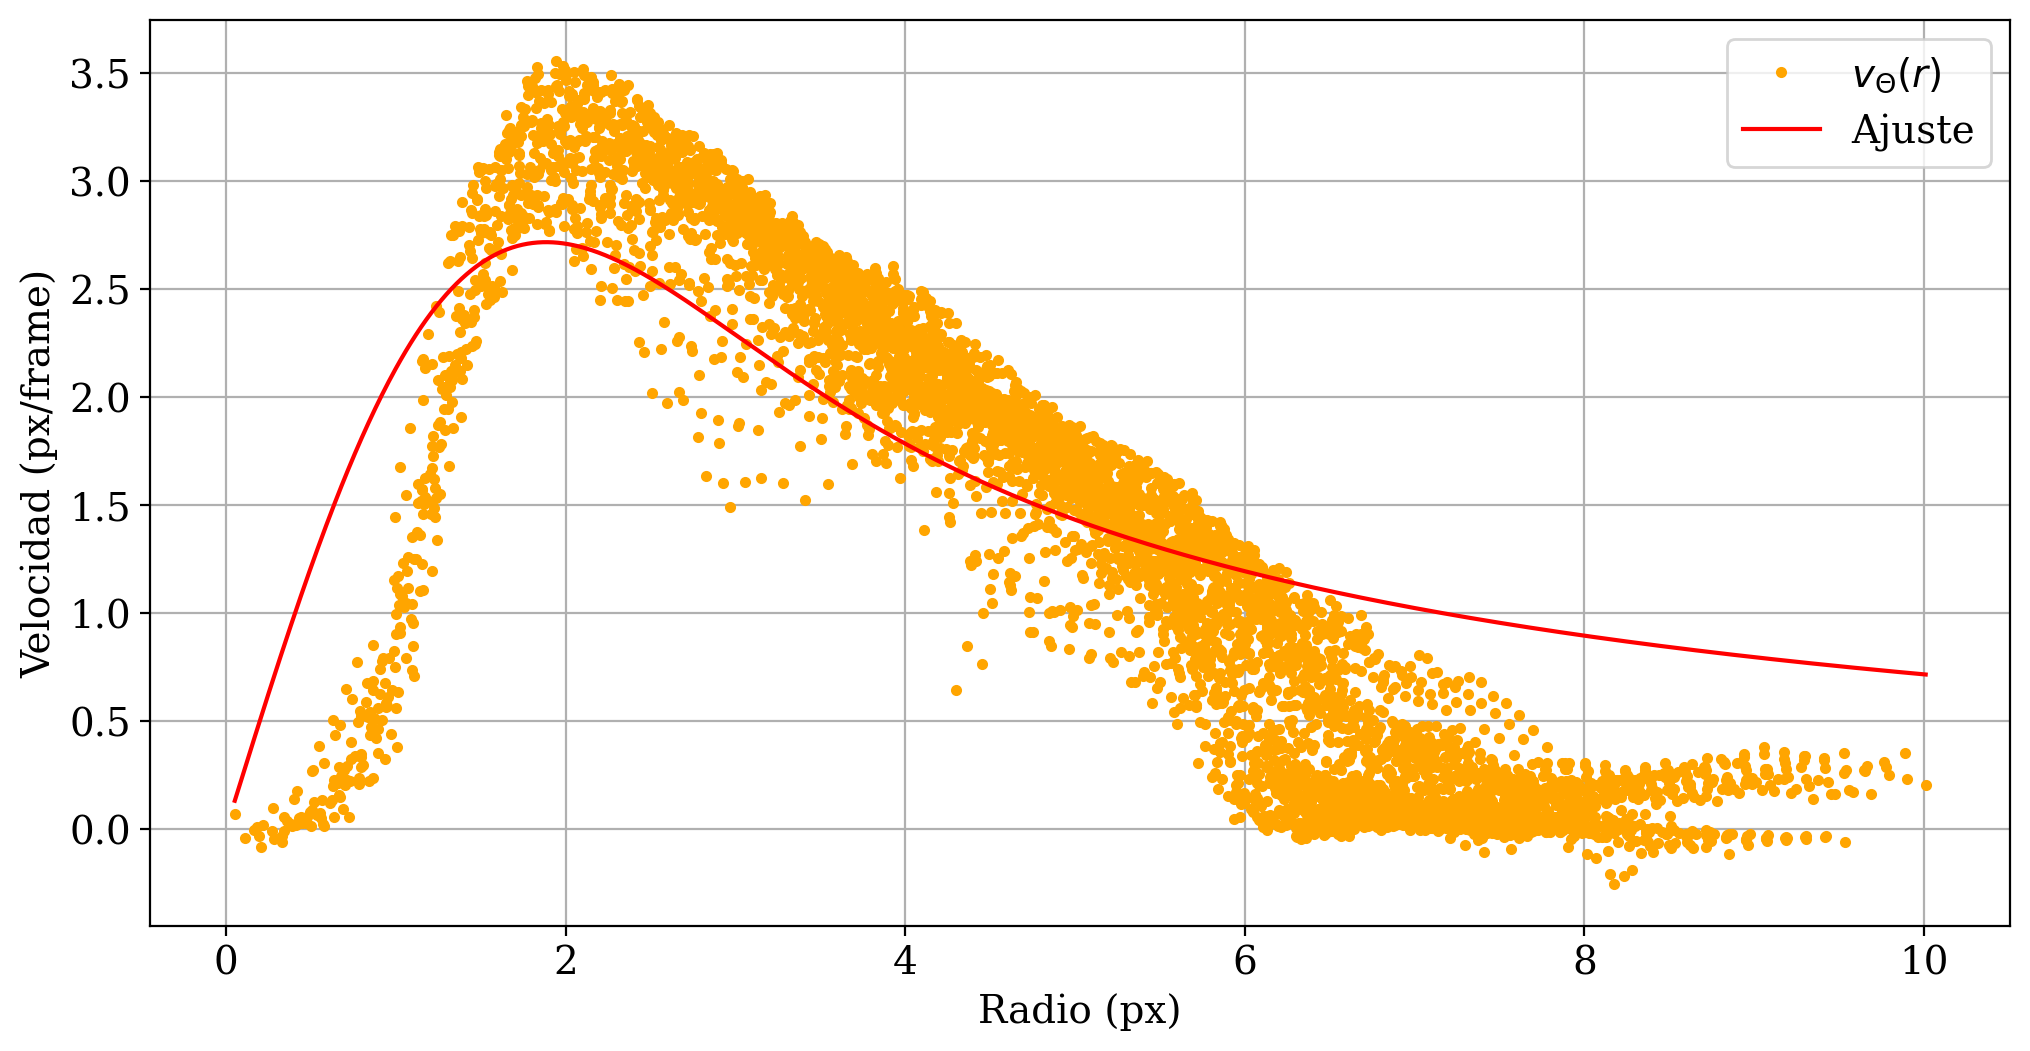

a: 7.1651499564259895 ± 0.04382082138116723
b: 1.68227249208843 ± 0.016785048309349904


In [28]:
var_x = r#[:5000] 
var_y = v_theta#[:5000]
err_y = 0

plt.plot(var_x,var_y, '.', label = '$v_{\Theta}(r)$', color = "orange")
#plt.errorbar(var_x, var_y,yerr=err_y, fmt="k.", label='$E_g (I)$',markersize = 3)

def rankine(x,omega,c): # Hay que chequearla porque no funciona
    if x > c:
        f = omega*x
    else:
        f = (omega*c**2)/x
    return f
def burgers(x,a,b):
  return a*(1-np.exp(-(x/b)**2))/x

f_ajuste = burgers

popt, pcov = curve_fit(f_ajuste, var_x, var_y)#,sigma=err_y,absolute_sigma=True)#, p0 = [-200,0.3,250], maxfev=10000)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel("Radio (px)")
plt.ylabel("Velocidad (px/frame)")

# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('ajuste v_t.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b= np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')

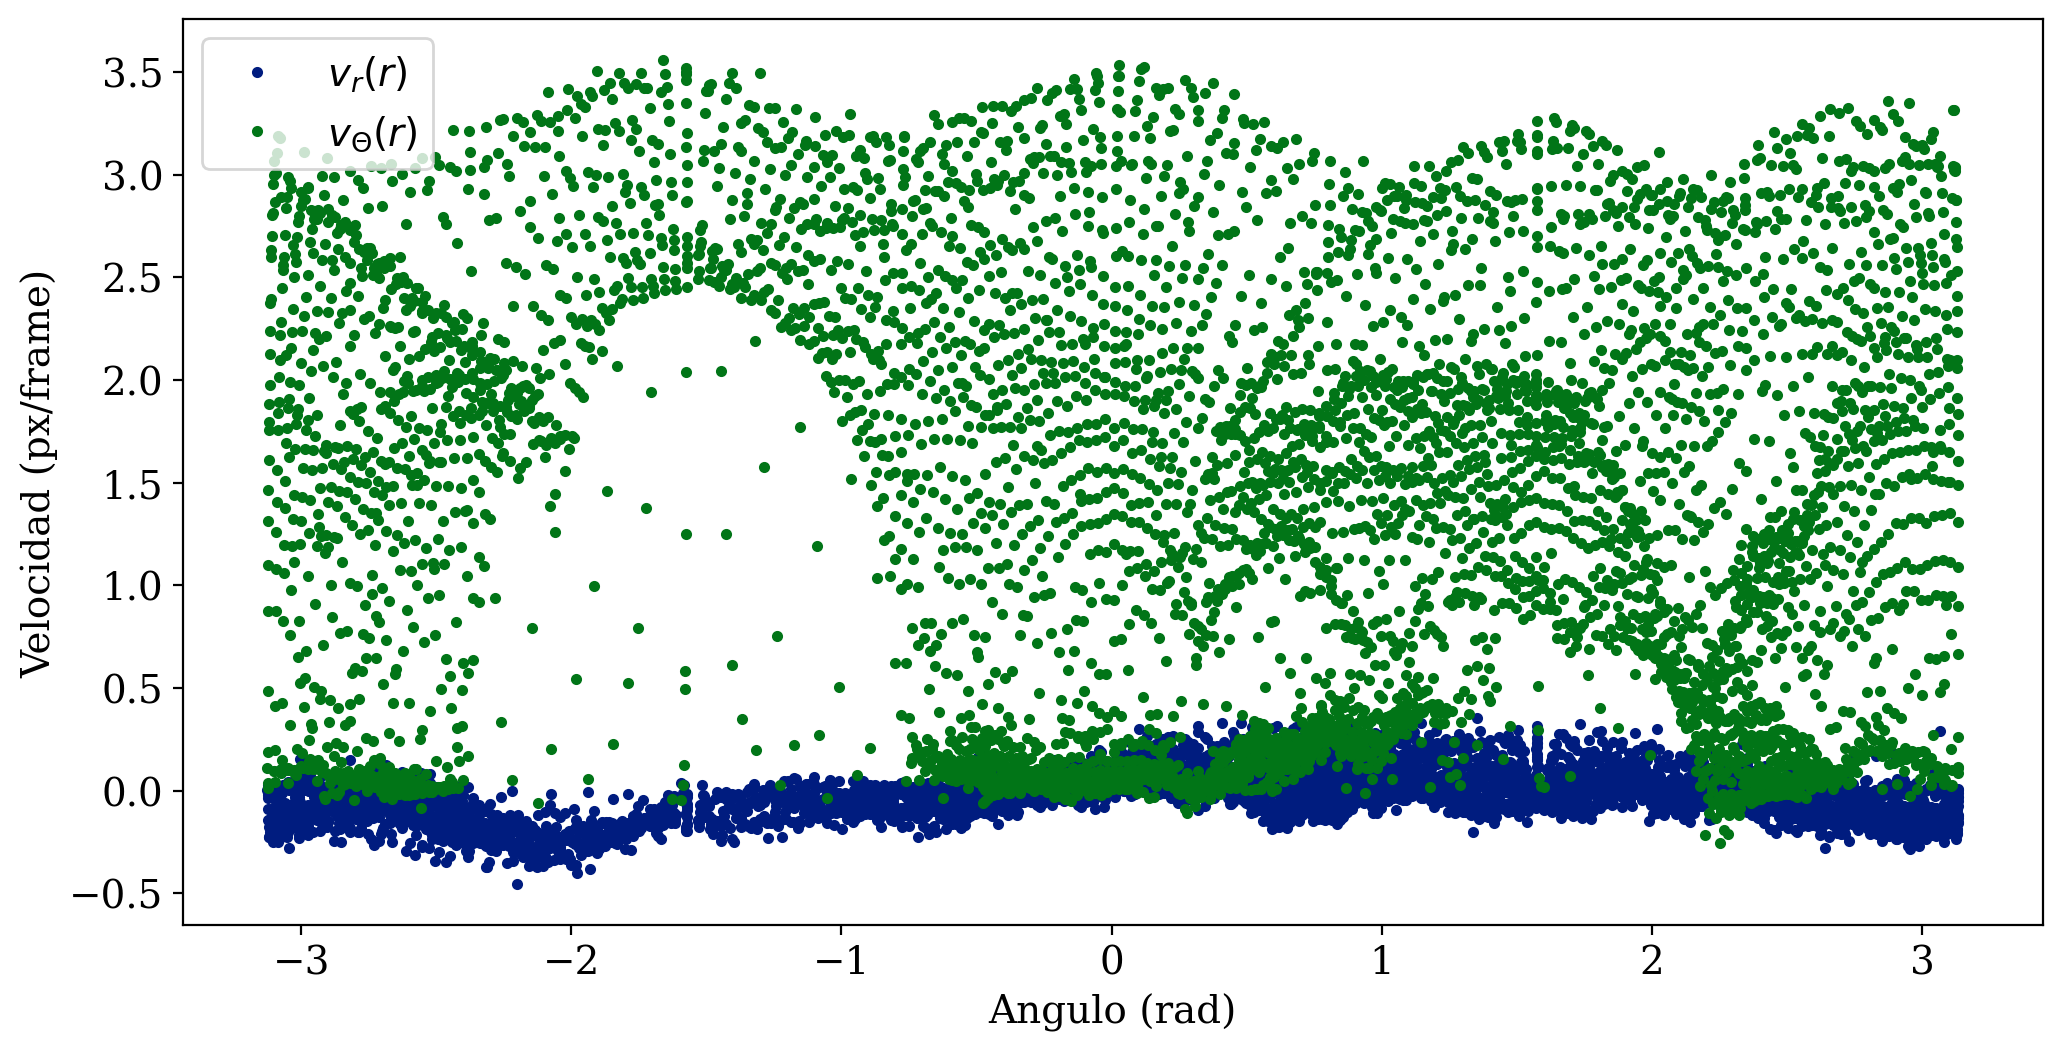

In [33]:
plt.plot(theta,v_r,".",label = "$v_{r}(r)$")
plt.plot(theta,v_theta,".",label = "$v_\Theta(r)$")
plt.xlabel('Angulo (rad)')
plt.ylabel('Velocidad (px/frame)')
plt.legend()
plt.savefig("Velocidades en funcion del angulo")
plt.show()

Ahora pasamos a hacer estadistica sobre los valores

In [23]:
ordenamiento = sorted(zip(r,v_r,v_theta))
r_ord = [i[0] for i in ordenamiento]
v_r_ord = [i[1] for i in ordenamiento]
v_t_ord = [i[2] for i in ordenamiento]
#r_ord

In [34]:
rango = 0.02
r_promedio = []
v_r_promedio = []
v_t_promedio = []

i = 0
j = 0
while i < len(r):
    l_r_prom = []
    l_v_r_prom = []
    l_v_t_prom = []
    while j < len(r) and r[i] <= r[j] + rango:
        l_r_prom.append(r[j])
        l_v_r_prom.append(v_r[j])
        l_v_t_prom.append(v_theta[j])
        j += 1
    if len(l_r_prom) != 0:
        r_promedio.append(sum(l_r_prom)/len(l_r_prom))
        v_r_promedio.append(sum(l_v_r_prom)/len(l_v_r_prom))
        v_t_promedio.append(sum(l_v_t_prom)/len(l_v_t_prom))
    i = j

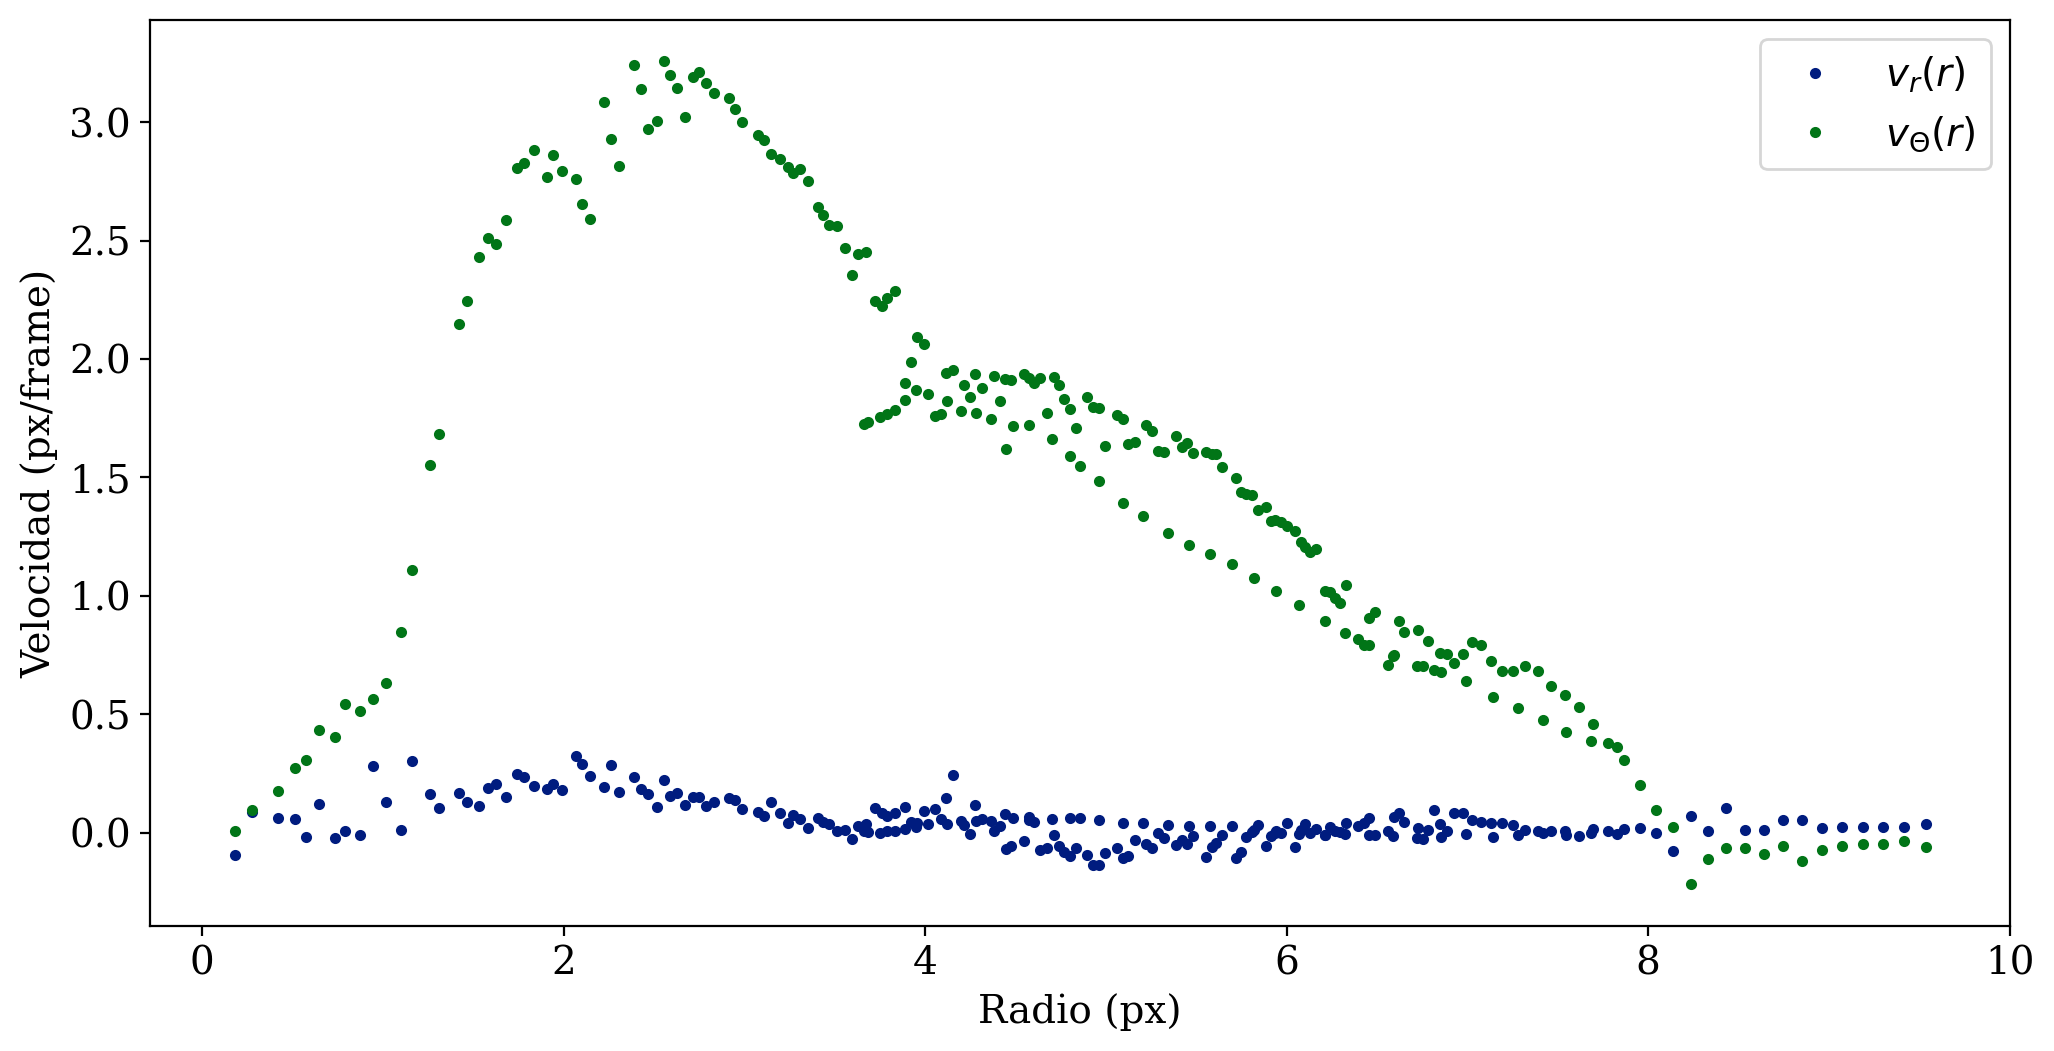

In [36]:
plt.plot(r_promedio,v_r_promedio,".",label = "$v_{r}(r)$")
plt.plot(r_promedio,v_t_promedio,".",label = "$v_\Theta(r)$")
plt.xlabel('Radio (px)')
plt.ylabel('Velocidad (px/frame)')
plt.legend()
plt.show()

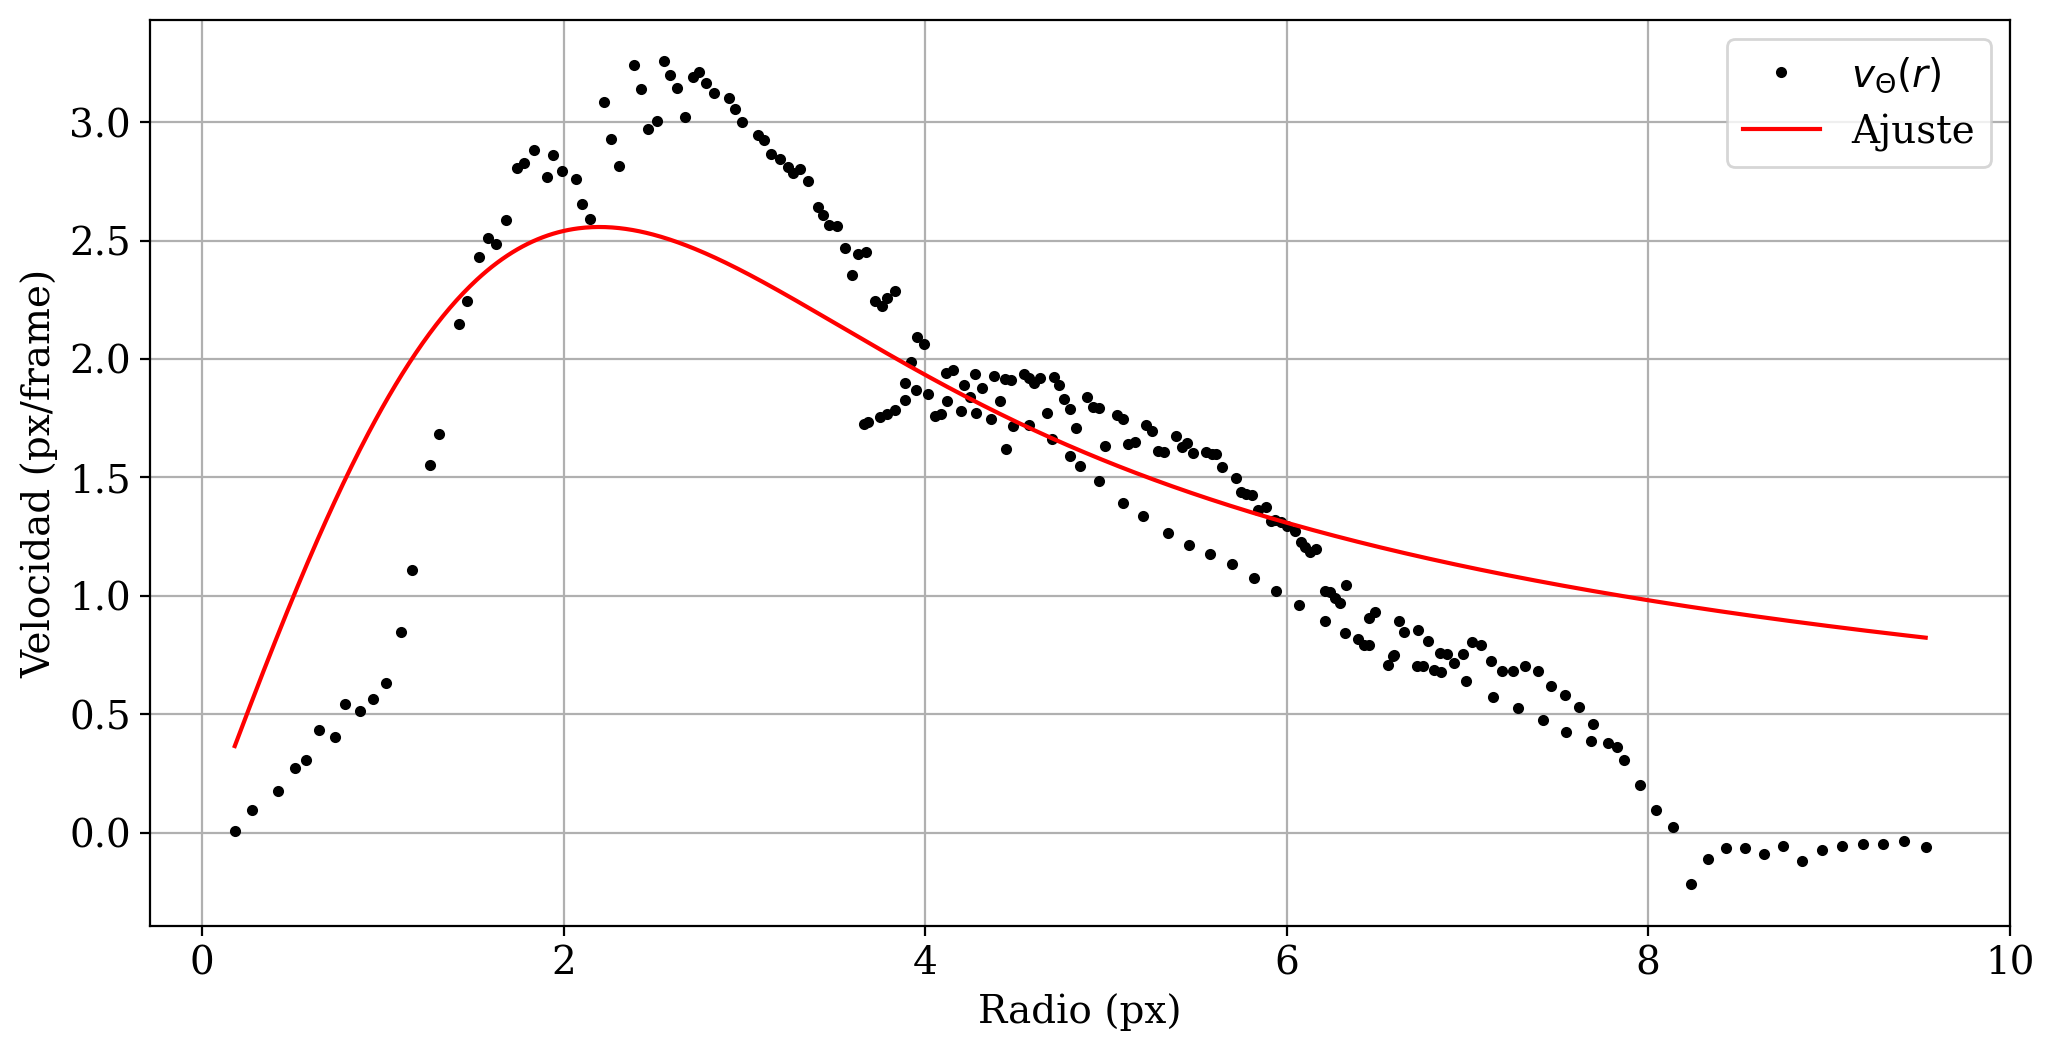

a: 7.854685073453008 ± 0.19374782886454534
b: 1.9601681073994297 ± 0.06768266997453155


In [38]:
var_x = r_promedio#Ponerle el menos si quedo al reves la curva
var_y = v_t_promedio
err_y = 0

plt.plot(var_x,var_y, 'k.', label = '$v_{\Theta}(r)$')
#plt.errorbar(var_x, var_y,yerr=err_y, fmt="k.", label='$E_g (I)$',markersize = 3)

def rankine(x,omega,c): 
    if x > c:
        f = omega*x
    else:
        f = (omega*c**2)/x
    return f
        
def burgers(x,omega,c):
  return omega*(1-np.exp(-(x/c)**2))/x

popt, pcov = curve_fit(burgers, var_x, var_y)#,sigma=err_y,absolute_sigma=True)#, p0 = [-200,0.3,250], maxfev=10000)#, absolute_sigma = True, sigma=err_var_y)
a, b = popt

# Declaramos nuestro nuevo dominio e imagen y graficamos el ajuste
new_var_x = np.linspace(min(var_x), max(var_x), 1000)
new_var_y = f_ajuste(new_var_x, a, b)
plt.plot(new_var_x, new_var_y, '-r', label='Ajuste')

# Títuo y labels
#plt.title('Datos y Ajuste lineal', fontsize=16)
plt.xlabel("Radio (px)")
plt.ylabel("Velocidad (px/frame)")

# Grid, legend, save y show
plt.grid(True)
plt.legend()
plt.savefig('Ajuste promedio.png')
plt.show()

# Printiamos en pantalla los parámetros óptimos con sus errores
err_a, err_b = np.sqrt(np.diag(pcov))
print(f'a: {a} ± {err_a}')
print(f'b: {b} ± {err_b}')